In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv("train_v4.0.csv", header = 0, encoding = "SHIFT-JIS")

In [3]:
train=train.drop("Unnamed: 0", axis=1)
#train.drop(train.columns[np.isnan(train).any()], axis=1)

train

,kind,date,mode_price,area,mean_temp,max_temp,min_temp,sum_rain,sun_time,mean_humid,difference_temp
0,だいこん,20051107,735.0,0,18.8,24.4,14.7,7.0,5.5,64.0,9.7
1,キャベツ,20051107,682.5,0,18.8,24.4,14.7,7.0,5.5,64.0,9.7
2,トマト,20051107,2415.0,0,18.8,24.4,14.7,7.0,5.5,64.0,9.7
3,だいこん,20051108,840.0,0,17.7,22.0,13.7,0.0,9.5,49.0,8.3
4,キャベツ,20051108,682.5,0,17.7,22.0,13.7,0.0,9.5,49.0,8.3
...,...,...,...,...,...,...,...,...,...,...,...
16745,ミニトマト,20210924,227.0,1,18.0,20.0,15.8,9.0,0.0,86.0,4.2
16746,ミニトマト,20210925,227.0,1,16.8,21.9,11.9,0.0,11.4,70.0,10.0
16747,ミニトマト,20210927,205.0,1,17.5,24.5,11.2,0.0,9.7,75.0,13.3
16748,ミニトマト,20210928,216.0,1,18.4,25.4,13.1,0.0,7.8,77.0,12.3


In [4]:
train.describe()

,date,mode_price,area,mean_temp,max_temp,min_temp,sum_rain,sun_time,mean_humid,difference_temp
count,1.675000e+04,16750.000000,16750.000000,16647.000000,16647.000000,16647.000000,16647.000000,16641.000000,16647.000000,16647.000000
mean,2.013204e+07,1354.865284,0.953075,14.406680,18.568655,10.833610,3.834024,5.544408,64.160209,7.735045
std,4.773523e+04,668.690309,2.537757,7.064801,7.396428,7.278064,11.176967,4.073220,16.058622,2.612382
min,2.005111e+07,39.750000,0.000000,-0.600000,2.200000,-4.500000,0.000000,0.000000,23.000000,1.100000
25%,2.009053e+07,864.000000,0.000000,8.000000,12.200000,4.300000,0.000000,1.100000,52.000000,6.000000
50%,2.013050e+07,1260.000000,0.000000,13.900000,18.000000,9.900000,0.000000,6.100000,67.000000,7.800000
75%,2.017091e+07,1728.000000,0.000000,20.500000,24.600000,17.200000,1.500000,9.200000,76.000000,9.400000
max,2.022043e+07,7087.500000,12.000000,31.800000,37.700000,28.300000,238.000000,14.200000,100.000000,21.000000


In [5]:
train=train.replace("だいこん",0)
train=train.replace("にんじん",1)
train=train.replace("キャベツ",2)
train=train.replace("レタス",3)
train=train.replace("はくさい",4)
train=train.replace("こまつな",5)
train=train.replace("ほうれんそう",6)
train=train.replace("ねぎ",7)
train=train.replace("きゅうり",8)
train=train.replace("トマト",9)
train=train.replace("ピーマン",10)
train=train.replace("じゃがいも",11)
train=train.replace("なましいたけ",12)
train=train.replace("セルリー",13)
train=train.replace("そらまめ",14)
train=train.replace("ミニトマト",15)
train

,kind,date,mode_price,area,mean_temp,max_temp,min_temp,sum_rain,sun_time,mean_humid,difference_temp
0,0,20051107,735.0,0,18.8,24.4,14.7,7.0,5.5,64.0,9.7
1,2,20051107,682.5,0,18.8,24.4,14.7,7.0,5.5,64.0,9.7
2,9,20051107,2415.0,0,18.8,24.4,14.7,7.0,5.5,64.0,9.7
3,0,20051108,840.0,0,17.7,22.0,13.7,0.0,9.5,49.0,8.3
4,2,20051108,682.5,0,17.7,22.0,13.7,0.0,9.5,49.0,8.3
...,...,...,...,...,...,...,...,...,...,...,...
16745,15,20210924,227.0,1,18.0,20.0,15.8,9.0,0.0,86.0,4.2
16746,15,20210925,227.0,1,16.8,21.9,11.9,0.0,11.4,70.0,10.0
16747,15,20210927,205.0,1,17.5,24.5,11.2,0.0,9.7,75.0,13.3
16748,15,20210928,216.0,1,18.4,25.4,13.1,0.0,7.8,77.0,12.3


<AxesSubplot:>

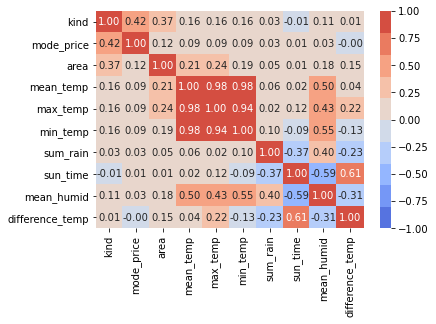

In [6]:
cor = train[[ 'kind','mode_price', 'area','mean_temp','max_temp','min_temp', 'sum_rain', 'sun_time', 'mean_humid', 'difference_temp']].corr()
hm=sns.heatmap(cor, cmap= sns.color_palette('coolwarm', 10), annot=True,fmt='.2f', vmin = -1, vmax = 1)
hm

In [7]:
train=train.drop("max_temp", axis=1)
train=train.drop("min_temp", axis=1)
train=train.drop("date", axis=1)
train

,kind,mode_price,area,mean_temp,sum_rain,sun_time,mean_humid,difference_temp
0,0,735.0,0,18.8,7.0,5.5,64.0,9.7
1,2,682.5,0,18.8,7.0,5.5,64.0,9.7
2,9,2415.0,0,18.8,7.0,5.5,64.0,9.7
3,0,840.0,0,17.7,0.0,9.5,49.0,8.3
4,2,682.5,0,17.7,0.0,9.5,49.0,8.3
...,...,...,...,...,...,...,...,...
16745,15,227.0,1,18.0,9.0,0.0,86.0,4.2
16746,15,227.0,1,16.8,0.0,11.4,70.0,10.0
16747,15,205.0,1,17.5,0.0,9.7,75.0,13.3
16748,15,216.0,1,18.4,0.0,7.8,77.0,12.3


In [8]:
y = train[['mode_price']]
x = train[['kind', 'area', 'mean_temp', 'sum_rain', 'sun_time', 'mean_humid', 'difference_temp']]

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=13)
np_y_train = y_train.to_numpy().ravel(); np_y_test = y_test.to_numpy().ravel()

In [10]:
print(x_train)
print(np_y_train)

       kind  area  mean_temp  sum_rain  sun_time  mean_humid  difference_temp
11965     8     0        5.5       0.0       7.0        26.0              7.6
16503    14    12       17.0       0.0      11.0        70.0             11.2
3193      0     0       12.9      13.0       0.1        79.0             11.3
7743      1     0       13.0       0.0       9.8        32.0              6.6
9143      2     0        6.6       0.0       9.5        51.0              8.4
...     ...   ...        ...       ...       ...         ...              ...
153       2     0        6.3       0.0       6.1        41.0              5.3
866       0     0       18.2       0.0       4.1        77.0              7.6
74        7     0        9.8       0.0       4.5        57.0             10.8
14512     3     4       26.4      51.5       6.6        76.0             12.1
338       2     0        7.0      10.0       0.0        91.0              6.1

[15075 rows x 7 columns]
[1836.  2100.   682.5 ... 1129.  1155.

In [11]:
for i in [0.1, 0.01, 0.001]:
    for j in [100, 250, 500, 750]:
        gbt = GradientBoostingRegressor(learning_rate=i, n_estimators=j)
        gbt = gbt.fit(x_train, np_y_train)
        print("predict output for GradientBoostingRegressor: learning_rate={}, n_estimators={}".format(i, j))
        mse = mean_squared_error(np_y_test, gbt.predict(x_test))
        print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

        pred2 = gbt.predict(x_test)
        print("Accuracy on training set: %.3f" % gbt.score(x_train, np_y_train))
        print("Accuracy on test set: %.3f" % gbt.score(x_test, np_y_test))
        print("==============================================")

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [12]:
print(train.isnull().all())

kind               False
mode_price         False
area               False
mean_temp          False
sum_rain           False
sun_time           False
mean_humid         False
difference_temp    False
dtype: bool
